In [1]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt


In [2]:
# Set max row and column display
pd.options.display.max_rows=None
pd.options.display.max_columns=None

In [3]:
# Set paths for article CSV files
file_part1 = "Resources/df_merged_articles_clean_part1.csv"
file_part2 = "Resources/df_merged_articles_clean_part2.csv"
file_part3 = "Resources/df_merged_articles_clean_part3.csv"
file_part4 = "Resources/df_merged_articles_clean_part4.csv"

In [4]:
# Read the merged article CSV files into DataFrames
df_merged_articles_clean_part1 = pd.read_csv(file_part1)
df_merged_articles_clean_part2 = pd.read_csv(file_part2)
df_merged_articles_clean_part3 = pd.read_csv(file_part3)
df_merged_articles_clean_part4 = pd.read_csv(file_part4)
print("Input files have been read in")

Input files have been read in


In [5]:
# Concatenate article CSV files into merged dataframe
df_merged_articles_clean = pd.concat([df_merged_articles_clean_part1, df_merged_articles_clean_part2,
                                     df_merged_articles_clean_part3, df_merged_articles_clean_part4],
                                     ignore_index=True)

In [6]:
# Print first 5 rows of df_merged_articles_clean dataframe
df_merged_articles_clean.head()

,title,text,cleaned_text,subject,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,donald trump wish american happy new year leav...,News,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,house intelligence committee chairman devin nu...,News,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",friday revealed former milwaukee sheriff david...,News,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",christmas day donald trump announced would bac...,News,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,pope francis used annual christmas day message...,News,0


In [7]:
# Display shape of df_merged_articles_clean dataframe
df_merged_articles_clean.shape

(44898, 5)

In [8]:
# Rows with null cleaned_text column contain article text that are URLs or blank.
# These rows can be deleted with a small impact on the overall row count (reduced from 44898 to 44182).
df_merged_articles_revised = df_merged_articles_clean.dropna(subset=['cleaned_text'])
print(df_merged_articles_revised.head())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text  \
0  Donald Trump just couldn t wish all Americans ...   
1  House Intelligence Committee Chairman Devin Nu...   
2  On Friday, it was revealed that former Milwauk...   
3  On Christmas day, Donald Trump announced that ...   
4  Pope Francis used his annual Christmas Day mes...   

                                        cleaned_text subject  class  
0  donald trump wish american happy new year leav...    News      0  
1  house intelligence committee chairman devin nu...    News      0  
2  friday revealed former milwaukee sheriff david...    News      0  
3  christmas day donald trump announced would 

In [9]:
# Display shape of df_merged_articles_revised dataframe
df_merged_articles_revised.shape

(44182, 5)

In [10]:
# Display info for of df_merged_articles_clean dataframe
df_merged_articles_revised.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44182 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         44182 non-null  object
 1   text          44182 non-null  object
 2   cleaned_text  44182 non-null  object
 3   subject       44182 non-null  object
 4   class         44182 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.0+ MB


In [11]:
# Create smaller dataframe to separate articles into real and fake dataframes to use in WordCloud
vader_cols = ['title', 'cleaned_text', 'class']

# Create new df_articles_vader dataframe
df_articles_vader = df_merged_articles_revised[vader_cols]

# Display first 5 rows of df_articles_vader dataframe
df_articles_vader.head()

,title,cleaned_text,class
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish american happy new year leav...,0
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced would bac...,0
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,0


In [12]:
# Create function that measures the sentiment of a sentence using SentimentIntensityAnalyzer
def get_sentiment_rating(sentence):
    # Create a SentimentIntensityAnalyzer object
    vader_sentiment = SentimentIntensityAnalyzer()

    # The polarity_scores method of SentimentIntensityAnalyzer returns a sentiment dictionary
    # that contains positive, negative, neutral, and compound scores.
    vader_sentiment_dict = vader_sentiment.polarity_scores(sentence)
     
    #print(f'The overall sentiment dictionary is: {vader_sentiment_dict}')
    #print(f'sentence sentiment is rated {vader_sentiment_dict["neg"]*100}% Negative')
    #print(f'sentence sentiment is rated {vader_sentiment_dict["neu"]*100}% Neutral')
    #print(f'sentence sentiment is rated {vader_sentiment_dict["pos"]*100}% Positive')

    # Determine if sentiment is positive, negative or neutral
    if vader_sentiment_dict['compound'] >= 0.05 :
        sentiment_rating = 'Positive'
    elif vader_sentiment_dict['compound'] <= - 0.05 :
        sentiment_rating = 'Negative'
    else :
        sentiment_rating = 'Neutral'
    
    #print(f'Sentence Overall is rated {sentiment_rating}')
    return sentiment_rating


In [13]:
# Test get_sentiment_rating function
test_sentence = "Google is a great place to search for answers when you don't have any!"
test_result = get_sentiment_rating(test_sentence)
test_result

'Positive'

In [14]:
# Add a new Sentiment column to the df_articles_vader dataframe based on article title
df_articles_vader['sentiment'] = df_articles_vader['title'].apply(get_sentiment_rating)
df_articles_vader.head()

C:\Users\tacle\AppData\Local\Temp\ipykernel_14968\2582203316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_articles_vader['sentiment'] = df_articles_vader['title'].apply(get_sentiment_rating)


,title,cleaned_text,class,sentiment
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish american happy new year leav...,0,Negative
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,0,Negative
2,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,0,Negative
3,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced would bac...,0,Negative
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,0,Neutral


In [15]:
# Display value counts for new df_articles_vader Sentiment column 
df_articles_vader['sentiment'].value_counts()

sentiment
Negative    19851
Neutral     12848
Positive    11483
Name: count, dtype: int64

In [16]:
# Display value counts for new df_articles_vader Class and Sentiment columns 
df_articles_vader[['class','sentiment']].value_counts()

class  sentiment
0      Negative     11813
1      Negative      8038
       Neutral       7849
0      Positive      5954
1      Positive      5529
0      Neutral       4999
Name: count, dtype: int64

In [17]:
# Create df_real_articles_vader dataframe with real articles (class=1) to analyze using WordCloud
df_real_articles_vader = df_articles_vader.loc[df_articles_vader['class'] == 1]
print(df_real_articles_vader.shape)
print(df_real_articles_vader.head())

(21416, 4)
                                                   title  \
23481  As U.S. budget fight looms, Republicans flip t...   
23482  U.S. military to accept transgender recruits o...   
23483  Senior U.S. Republican senator: 'Let Mr. Muell...   
23484  FBI Russia probe helped by Australian diplomat...   
23485  Trump wants Postal Service to charge 'much mor...   

                                            cleaned_text  class sentiment  
23481  washington reuters head conservative republica...      1  Negative  
23482  washington reuters transgender people allowed ...      1  Positive  
23483  washington reuters special counsel investigati...      1   Neutral  
23484  washington reuters trump campaign adviser geor...      1   Neutral  
23485  seattlewashington reuters president donald tru...      1  Positive  


In [18]:
# Create df_fake_articles_vader dataframe with fake articles (class=0) to analyze using WordCloud
df_fake_articles_vader = df_articles_vader.loc[df_articles_vader['class'] == 0]
print(df_fake_articles_vader.shape)
print(df_fake_articles_vader.head())

(22766, 4)
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                        cleaned_text  class sentiment  
0  donald trump wish american happy new year leav...      0  Negative  
1  house intelligence committee chairman devin nu...      0  Negative  
2  friday revealed former milwaukee sheriff david...      0  Negative  
3  christmas day donald trump announced would bac...      0  Negative  
4  pope francis used annual christmas day message...      0   Neutral  


sentiment
Negative    8038
Neutral     7849
Positive    5529
dtype: int64


<Axes: title={'center': 'Real Article Sentiment'}>

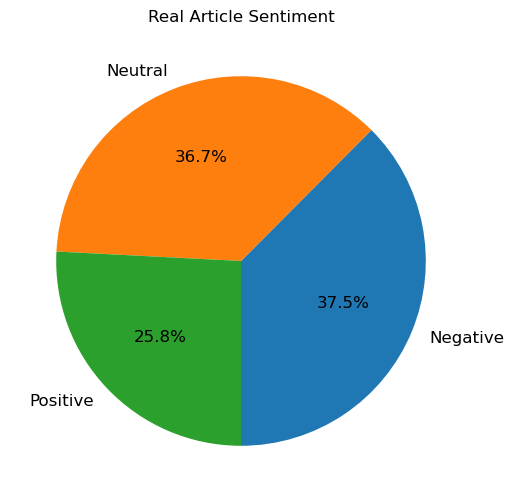

In [19]:
# Get count of real articles by sentiment
sentiment_counts_real = df_real_articles_vader.groupby(['sentiment']).size()
print(sentiment_counts_real)

# Display Pie Chart of real articles sentiment
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
plt.title('Real Article Sentiment')
sentiment_counts_real.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")


sentiment
Negative    11813
Neutral      4999
Positive     5954
dtype: int64


<Axes: title={'center': 'Fake Article Sentiment'}>

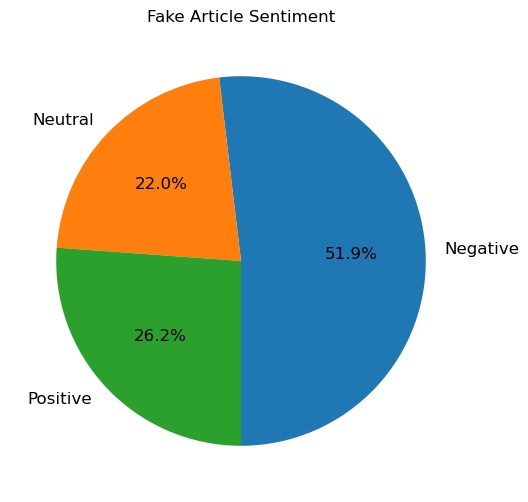

In [20]:
# Get count of fake articles by sentiment
sentiment_counts_fake = df_fake_articles_vader.groupby(['sentiment']).size()
print(sentiment_counts_fake)

# Display Pie Chart of fake articles sentiment
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
plt.title('Fake Article Sentiment')
sentiment_counts_fake.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")